In [3]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd
df = pd.read_csv('hotel_booking.csv')

In [9]:
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1   

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [15]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
df = df.dropna()

In [19]:
print(df.head(5))

             hotel  is_canceled  lead_time  arrival_date_year  \
2392  Resort Hotel            0          6               2015   
2697  Resort Hotel            0         24               2015   
2867  Resort Hotel            0         24               2015   
2877  Resort Hotel            0         24               2015   
2878  Resort Hotel            0         24               2015   

     arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
2392            October                        42                         11   
2697            October                        44                         26   
2867           November                        45                          3   
2877           November                        45                          3   
2878           November                        45                          3   

      stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
2392                        2                     0       2 

In [21]:
#1.Understand the distribution of arrival dates, including the most common arrival days and summary statistics for lead times.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
# Load the dataset
df = pd.read_csv('hotel_booking.csv')



In [39]:
# Convert arrival_date columns to datetime format
df['arrival_date'] = pd.to_datetime(df.apply(lambda row: f"{row['arrival_date_year']}-{row['arrival_date_month']}-{row['arrival_date_day_of_month']}", axis=1), format='%Y-%B-%d')


In [41]:
# Extract day of week and month from arrival_date
df['arrival_day_of_week'] = df['arrival_date'].dt.day_name()
df['arrival_month'] = df['arrival_date'].dt.month_name()

In [43]:
# Summary statistics for lead times
print("Summary Statistics for Lead Times:")
print(df['lead_time'].describe())

Summary Statistics for Lead Times:
count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


In [57]:
# Most common arrival days
print("\nMost Common Arrival Days:")
print(df['arrival_day_of_week'].value_counts().head(7))


Most Common Arrival Days:
arrival_day_of_week
Friday       19631
Thursday     19254
Monday       18171
Saturday     18055
Wednesday    16139
Sunday       14141
Tuesday      13999
Name: count, dtype: int64


In [59]:
# Most common arrival months
print("\nMost Common Arrival Months:")
print(df['arrival_month'].value_counts().head())


Most Common Arrival Months:
arrival_month
August     13877
July       12661
May        11791
October    11160
April      11089
Name: count, dtype: int64


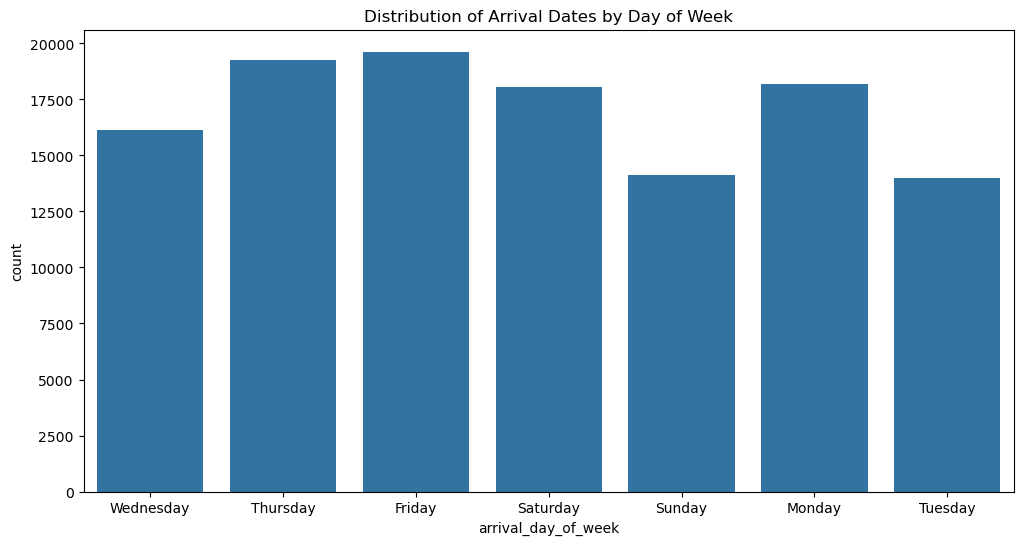

In [61]:
# Plot distribution of arrival dates
plt.figure(figsize=(12,6))
sns.countplot(x='arrival_day_of_week', data=df)
plt.title('Distribution of Arrival Dates by Day of Week')
plt.show()

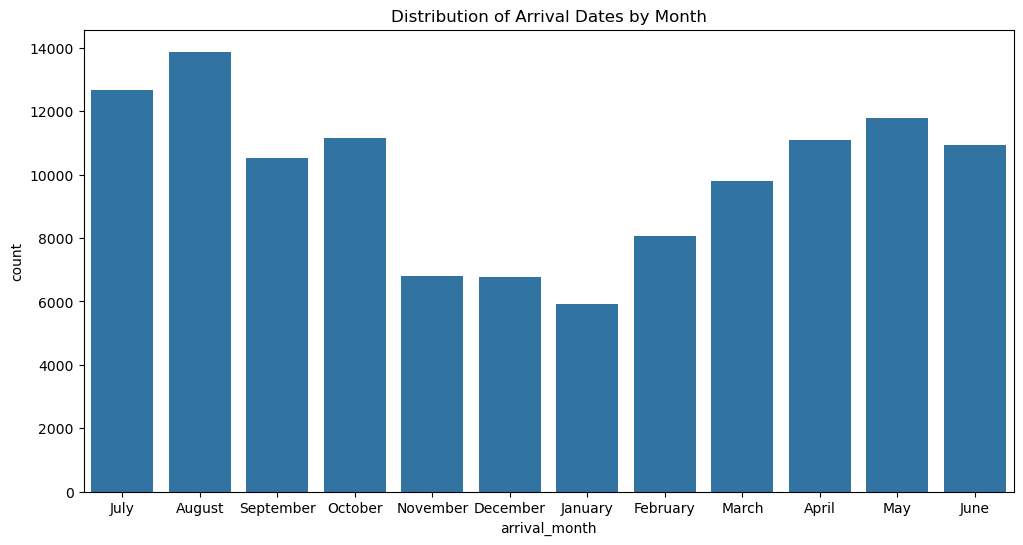

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(x='arrival_month', data=df)
plt.title('Distribution of Arrival Dates by Month')
plt.show()

In [65]:
#2.Identify peak booking months and analyze reasons for spikes in bookings, including holidays or events.
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
# Load the dataset
df = pd.read_csv('hotel_booking.csv')


In [71]:
# Convert arrival_date_month to datetime format
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B')


In [73]:
# Extract month from arrival_date_month
df['arrival_month'] = df['arrival_date_month'].dt.month


In [75]:
# Group by arrival_month and calculate the number of bookings
monthly_bookings = df.groupby('arrival_month')['is_canceled'].count()


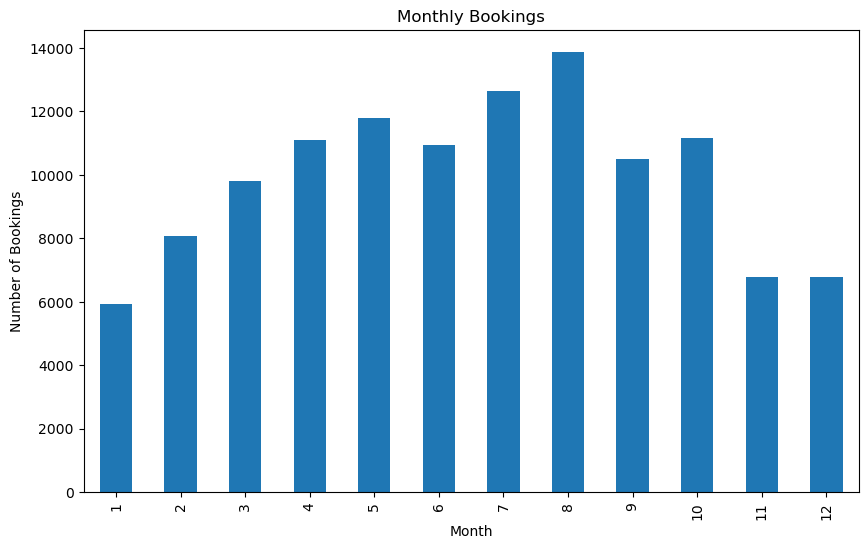

In [77]:
# Plot the monthly bookings
plt.figure(figsize=(10,6))
monthly_bookings.plot(kind='bar')
plt.title('Monthly Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()


In [79]:
# Identify peak booking months
peak_months = monthly_bookings.nlargest(3)


In [81]:
# Print the peak booking months
print("Peak Booking Months:")
print(peak_months)


Peak Booking Months:
arrival_month
8    13877
7    12661
5    11791
Name: is_canceled, dtype: int64


In [83]:
#3.Calculate the average length of stays for different hotel types and explore variations by meal plans.
import pandas as pd
import matplotlib.pyplot as plt


In [85]:
# Load the dataset
df = pd.read_csv('hotel_booking.csv')


In [87]:
# Group by hotel type and calculate the average length of stay
avg_length_of_stay = df.groupby('hotel')['stays_in_weekend_nights'].mean()


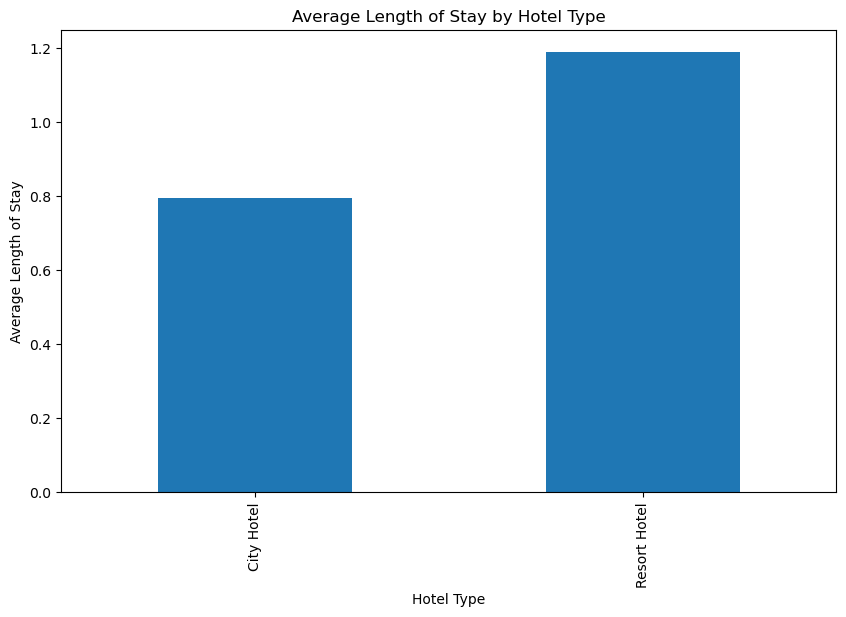

In [89]:
# Plot the average length of stay by hotel type
plt.figure(figsize=(10,6))
avg_length_of_stay.plot(kind='bar')
plt.title('Average Length of Stay by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Length of Stay')
plt.show()


In [91]:
# Group by hotel type and meal plan, and calculate the average length of stay
avg_length_of_stay_meal_plan = df.groupby(['hotel', 'meal'])['stays_in_weekend_nights'].mean()


<Figure size 1200x800 with 0 Axes>

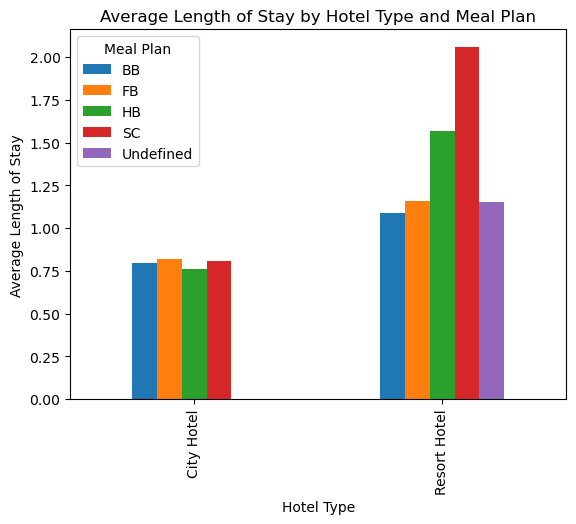

In [93]:
# Plot the average length of stay by hotel type and meal plan
plt.figure(figsize=(12,8))
avg_length_of_stay_meal_plan.unstack().plot(kind='bar')
plt.title('Average Length of Stay by Hotel Type and Meal Plan')
plt.xlabel('Hotel Type')
plt.ylabel('Average Length of Stay')
plt.legend(title='Meal Plan')
plt.show()


In [95]:
#4.Analyze how booking patterns have evolved over the years, including yearoveryear changes in bookings and cancellations.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('hotel_booking.csv')

# Convert arrival_date_year to datetime format
df['arrival_date_year'] = pd.to_datetime(df['arrival_date_year'], format='%Y')


In [97]:
# Extract year from arrival_date_year
df['arrival_year'] = df['arrival_date_year'].dt.year


In [99]:
# Group by arrival_year and calculate the number of bookings and cancellations
yearly_bookings = df.groupby('arrival_year')['is_canceled'].value_counts().unstack()


<Figure size 1000x600 with 0 Axes>

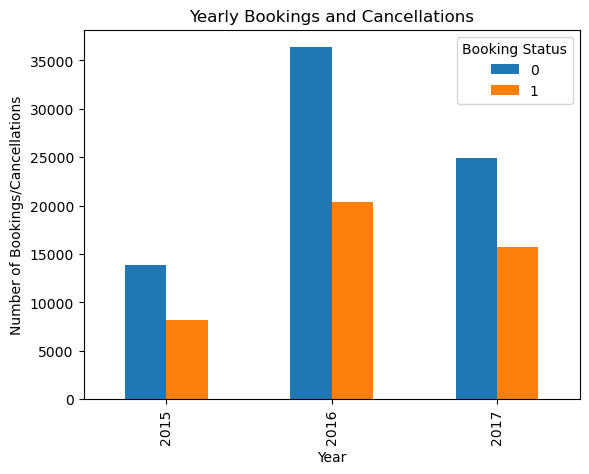

In [101]:
# Plot the yearly bookings and cancellations
plt.figure(figsize=(10,6))
yearly_bookings.plot(kind='bar')
plt.title('Yearly Bookings and Cancellations')
plt.xlabel('Year')
plt.ylabel('Number of Bookings/Cancellations')
plt.legend(title='Booking Status')
plt.show()


In [103]:
# Calculate year-over-year changes in bookings and cancellations
yearly_changes = yearly_bookings.pct_change()


<Figure size 1000x600 with 0 Axes>

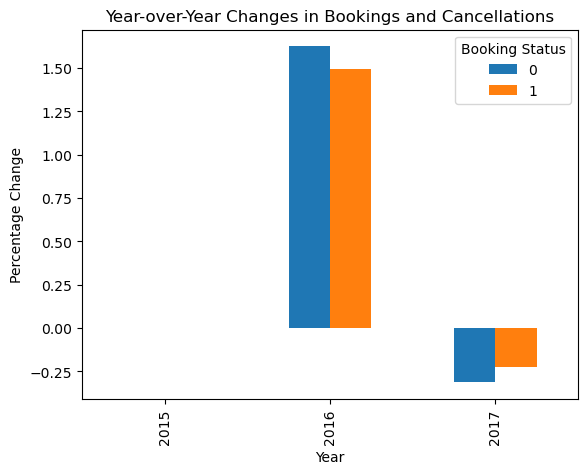

In [105]:
# Plot the yearly changes in bookings and cancellations
plt.figure(figsize=(10,6))
yearly_changes.plot(kind='bar')
plt.title('Year-over-Year Changes in Bookings and Cancellations')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend(title='Booking Status')
plt.show()


In [107]:
#5.Understand the distribution of the number of adults, children, and babies and identify any outliers.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')


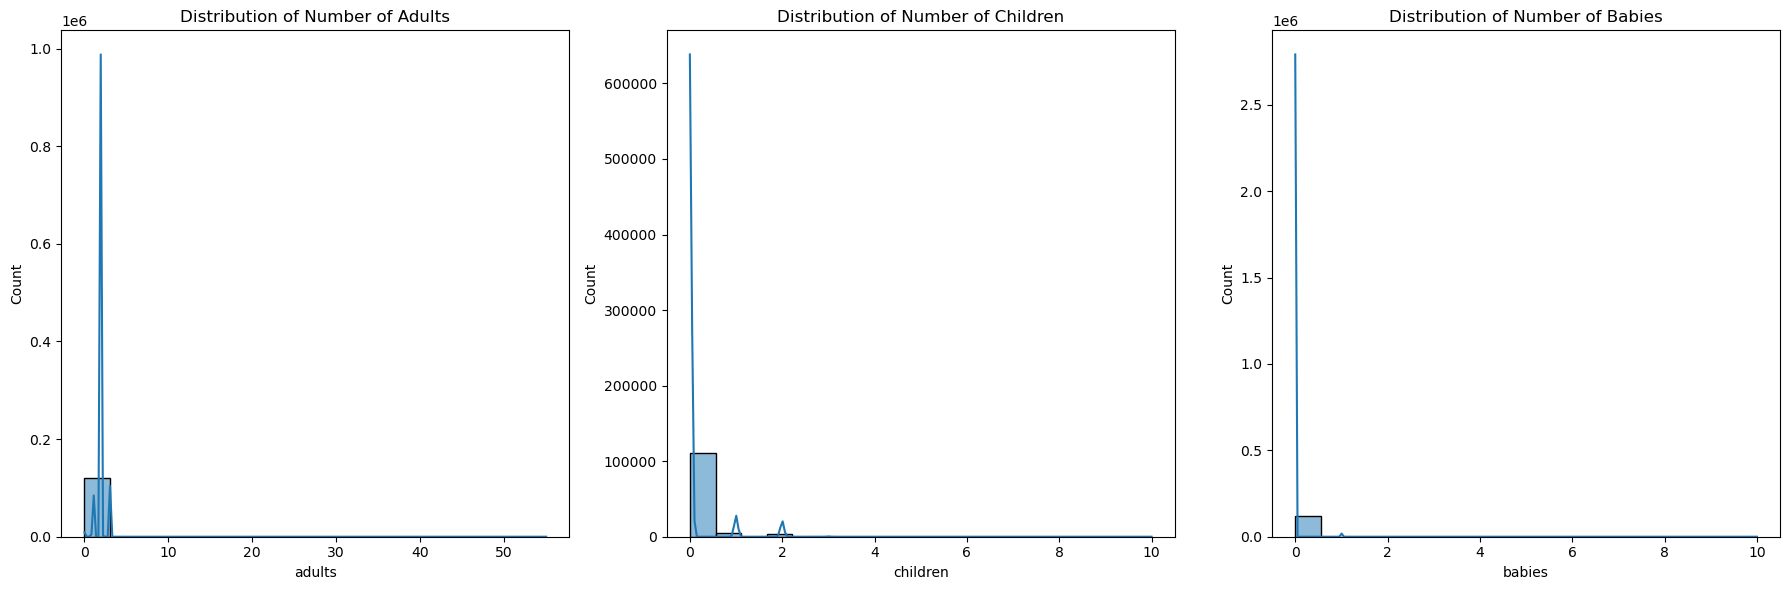

In [111]:
# Plot the distribution of the number of adults, children, and babies
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df['adults'], ax=ax[0], kde=True)
ax[0].set_title('Distribution of Number of Adults')

sns.histplot(df['children'], ax=ax[1], kde=True)
ax[1].set_title('Distribution of Number of Children')

sns.histplot(df['babies'], ax=ax[2], kde=True)
ax[2].set_title('Distribution of Number of Babies')

plt.tight_layout()
plt.show()



In [115]:
# Identify outliers using the IQR method
Q1_adults = df['adults'].quantile(0.25)
Q3_adults = df['adults'].quantile(0.75)
IQR_adults = Q3_adults - Q1_adults
outliers_adults = df[(df['adults'] < (Q1_adults - 1.5 * IQR_adults)) | (df['adults'] > (Q3_adults + 1.5 * IQR_adults))]
Q1_children = df['children'].quantile(0.25)
Q3_children = df['children'].quantile(0.75)
IQR_children = Q3_children - Q1_children
outliers_children = df[(df['children'] < (Q1_children - 1.5 * IQR_children)) | (df['children'] > (Q3_children + 1.5 * IQR_children))]
Q1_babies = df['babies'].quantile(0.25)
Q3_babies = df['babies'].quantile(0.75)
IQR_babies = Q3_babies - Q1_babies
outliers_babies = df[(df['babies'] < (Q1_babies - 1.5 * IQR_babies)) | (df['babies'] > (Q3_babies + 1.5 * IQR_babies))]



In [118]:
# Print the number of outliers for each column
print(f"Number of outliers for adults: {len(outliers_adults)}")
print(f"Number of outliers for children: {len(outliers_children)}")
print(f"Number of outliers for babies: {len(outliers_babies)}")


Number of outliers for adults: 29710
Number of outliers for children: 8590
Number of outliers for babies: 917


In [120]:
#6.Calculate summary statistics for ADR and explore differences between Resort Hotel and City Hotel bookings.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')


In [122]:
# Calculate summary statistics for ADR
adr_summary = df['adr'].describe()
print("Summary Statistics for ADR:")
print(adr_summary)


Summary Statistics for ADR:
count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64


In [124]:
# Group by hotel type and calculate summary statistics for ADR
adr_summary_by_hotel = df.groupby('hotel')['adr'].describe()
print("\nSummary Statistics for ADR by Hotel Type:")
print(adr_summary_by_hotel)



Summary Statistics for ADR by Hotel Type:
                count        mean        std   min   25%   50%    75%     max
hotel                                                                        
City Hotel    79330.0  105.304465  43.602954  0.00  79.2  99.9  126.0  5400.0
Resort Hotel  40060.0   94.952930  61.442418 -6.38  50.0  75.0  125.0   508.0


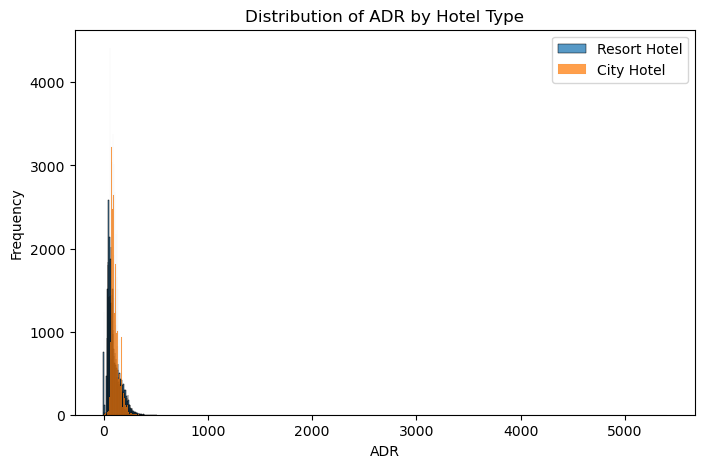

In [132]:
# Plot the distribution of ADR for Resort Hotel and City Hotel bookings
plt.figure(figsize=(8,5))
sns.histplot(df[df['hotel'] == 'Resort Hotel']['adr'], label='Resort Hotel')
sns.histplot(df[df['hotel'] == 'City Hotel']['adr'], label='City Hotel')
plt.title('Distribution of ADR by Hotel Type')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [134]:
# Compare the mean ADR for Resort Hotel and City Hotel bookings
resort_hotel_adr_mean = df[df['hotel'] == 'Resort Hotel']['adr'].mean()
city_hotel_adr_mean = df[df['hotel'] == 'City Hotel']['adr'].mean()
print(f"\nMean ADR for Resort Hotel: ${resort_hotel_adr_mean:.2f}")
print(f"Mean ADR for City Hotel: ${city_hotel_adr_mean:.2f}")



Mean ADR for Resort Hotel: $94.95
Mean ADR for City Hotel: $105.30


In [136]:
# Perform a t-test to compare the mean ADR for Resort Hotel and City Hotel bookings
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(df[df['hotel'] == 'Resort Hotel']['adr'], df[df['hotel'] == 'City Hotel']['adr'])
print(f"\nt-test statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")



t-test statistic: -33.5765
p-value: 0.0000


In [140]:
#7.Analyze the distribution of required car parking spaces for each hotel type and determine if one type attracts more guests with cars.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')

# Group by hotel type and calculate the mean and standard deviation of required car parking spaces
car_parking_spaces_stats = df.groupby('hotel')['required_car_parking_spaces'].agg(['mean', 'std'])
print("Mean and Standard Deviation of Required Car Parking Spaces by Hotel Type:")
print(car_parking_spaces_stats)


Mean and Standard Deviation of Required Car Parking Spaces by Hotel Type:
                  mean       std
hotel                           
City Hotel    0.024367  0.154919
Resort Hotel  0.138068  0.351001


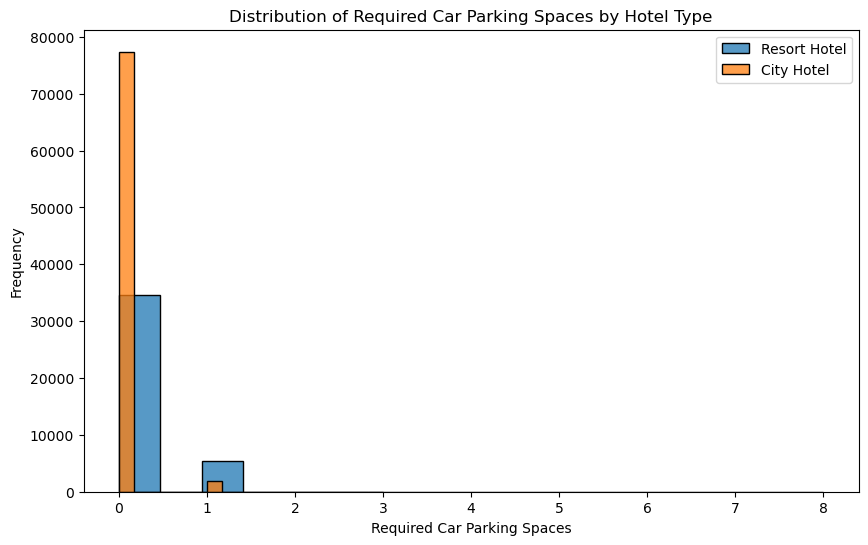

In [142]:
# Plot the distribution of required car parking spaces for each hotel type
plt.figure(figsize=(10,6))
sns.histplot(df[df['hotel'] == 'Resort Hotel']['required_car_parking_spaces'], label='Resort Hotel')
sns.histplot(df[df['hotel'] == 'City Hotel']['required_car_parking_spaces'], label='City Hotel')
plt.title('Distribution of Required Car Parking Spaces by Hotel Type')
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [144]:
# Compare the proportion of guests with cars for each hotel type
resort_hotel_guests_with_cars = df[(df['hotel'] == 'Resort Hotel') & (df['required_car_parking_spaces'] > 0)].shape[0] / df[df['hotel'] == 'Resort Hotel'].shape[0]
city_hotel_guests_with_cars = df[(df['hotel'] == 'City Hotel') & (df['required_car_parking_spaces'] > 0)].shape[0] / df[df['hotel'] == 'City Hotel'].shape[0]
print(f"\nProportion of Guests with Cars for Resort Hotel: {resort_hotel_guests_with_cars:.2%}")
print(f"Proportion of Guests with Cars for City Hotel: {city_hotel_guests_with_cars:.2%}")



Proportion of Guests with Cars for Resort Hotel: 13.70%
Proportion of Guests with Cars for City Hotel: 2.43%


In [146]:
# Perform a chi-squared test to determine if the proportion of guests with cars is significantly different between the two hotel types
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['hotel'], df['required_car_parking_spaces'] > 0)
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Squared Statistic: {chi2_stat:.4f}")
print(f"p-value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")



Chi-Squared Statistic: 5808.2042
p-value: 0.0000
Degrees of Freedom: 1


In [152]:
#8.Compare the total number of special requests made by different customer types (e.g., Transient, Group) and identify which customer type makes more requests.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('hotel_booking.csv')




In [156]:
# Group by customer type and calculate the total number of special requests
special_requests_by_customer_type = df.groupby('customer_type')['total_of_special_requests'].sum().reset_index()


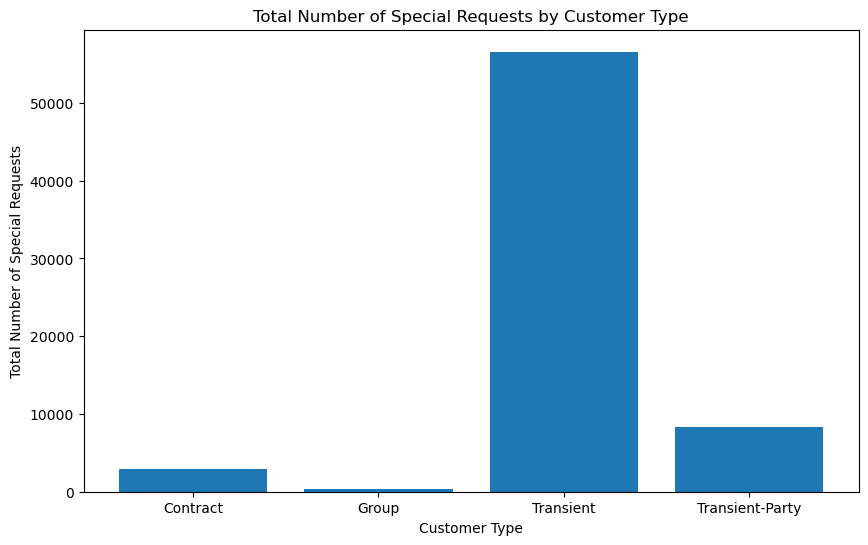

In [158]:
# Plot the total number of special requests by customer type
plt.figure(figsize=(10,6))
plt.bar(special_requests_by_customer_type['customer_type'], special_requests_by_customer_type['total_of_special_requests'])
plt.title('Total Number of Special Requests by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Number of Special Requests')
plt.show()


In [160]:
# Identify which customer type makes more requests
max_special_requests_customer_type = special_requests_by_customer_type.loc[special_requests_by_customer_type['total_of_special_requests'].idxmax()]['customer_type']
print(f"\nThe customer type that makes more requests is: {max_special_requests_customer_type}")



The customer type that makes more requests is: Transient


In [162]:
# Compare the average number of special requests per booking for each customer type
average_special_requests_by_customer_type = df.groupby('customer_type')['total_of_special_requests'].mean().reset_index()
print("\nAverage Number of Special Requests per Booking by Customer Type:")
print(average_special_requests_by_customer_type)



Average Number of Special Requests per Booking by Customer Type:
     customer_type  total_of_special_requests
0         Contract                   0.728901
1            Group                   0.644714
2        Transient                   0.631582
3  Transient-Party                   0.329327


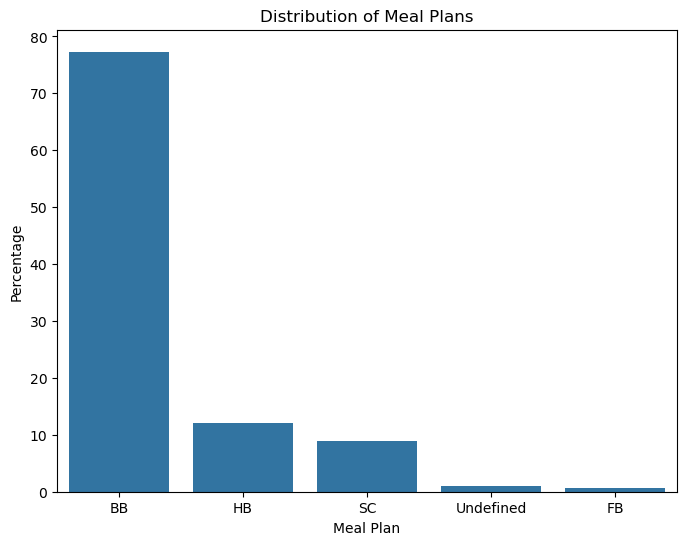


Meal Plan Distribution:
meal
BB           77.32
HB           12.11
SC            8.92
Undefined     0.98
FB            0.67
Name: proportion, dtype: float64

Meal Plan vs. Hotel Type:
hotel      City Hotel  Resort Hotel
meal                               
BB              62305         30005
FB                 44           754
HB               6417          8046
SC              10564            86
Undefined           0          1169

Meal Plan vs. Customer Type:
customer_type  Contract  Group  Transient  Transient-Party
meal                                                      
BB                 3260    499      70692            17859
FB                    5      1        547              245
HB                  613     36       8020             5794
SC                  183     39       9968              460
Undefined            15      2        386              766

Meal Plan vs. Average Daily Rate (ADR):
meal
BB            99.41
FB           109.04
HB           120.31
SC            

In [164]:
#9.Understand the distribution of meal plans (e.g., BB, HB, FB, SC) and identify any patterns or preferences.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')

# Calculate the distribution of meal plans
meal_plan_distribution = df['meal'].value_counts(normalize=True).mul(100).round(2)

# Plot the distribution of meal plans
plt.figure(figsize=(8,6))
sns.barplot(x=meal_plan_distribution.index, y=meal_plan_distribution.values)
plt.title('Distribution of Meal Plans')
plt.xlabel('Meal Plan')
plt.ylabel('Percentage')
plt.show()

# Identify any patterns or preferences
print("\nMeal Plan Distribution:")
print(meal_plan_distribution)

# Analyze the relationship between meal plans and other variables
print("\nMeal Plan vs. Hotel Type:")
print(pd.crosstab(df['meal'], df['hotel']))

print("\nMeal Plan vs. Customer Type:")
print(pd.crosstab(df['meal'], df['customer_type']))

print("\nMeal Plan vs. Average Daily Rate (ADR):")
print(df.groupby('meal')['adr'].mean().round(2))


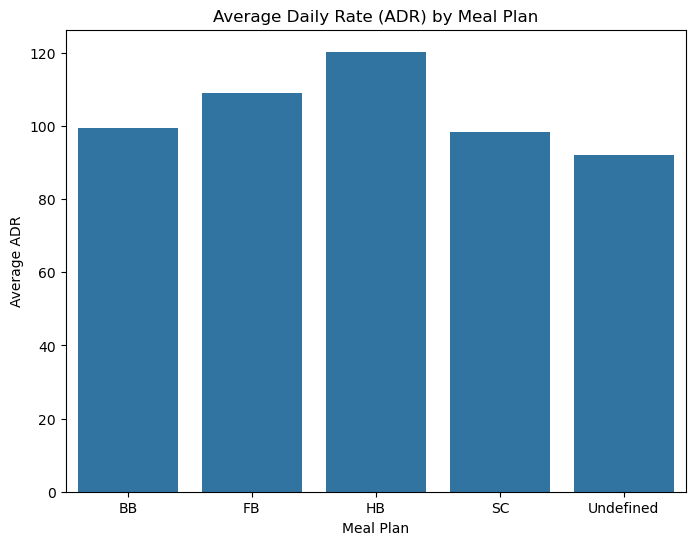


Standard Deviation of ADR by Meal Plan:
meal
BB           50.32
FB           65.11
HB           58.40
SC           29.36
Undefined    54.78
Name: adr, dtype: float64

Average ADR by Meal Plan and Hotel Type:
hotel      City Hotel  Resort Hotel
meal                               
BB             104.87         88.07
FB              76.40        110.95
HB             120.06        120.51
SC              99.05          6.13
Undefined         NaN         91.95


In [166]:
#10.Analyze Average Daily Rates (ADR) by meal plan type to identify variations in pricing.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')

# Group by meal plan and calculate the average ADR
adr_by_meal_plan = df.groupby('meal')['adr'].mean().round(2)

# Plot the average ADR by meal plan
plt.figure(figsize=(8,6))
sns.barplot(x=adr_by_meal_plan.index, y=adr_by_meal_plan.values)
plt.title('Average Daily Rate (ADR) by Meal Plan')
plt.xlabel('Meal Plan')
plt.ylabel('Average ADR')
plt.show()

# Analyze the standard deviation of ADR by meal plan
adr_std_by_meal_plan = df.groupby('meal')['adr'].std().round(2)
print("\nStandard Deviation of ADR by Meal Plan:")
print(adr_std_by_meal_plan)

# Compare the average ADR by meal plan and hotel type
adr_by_meal_plan_and_hotel = df.groupby(['meal', 'hotel'])['adr'].mean().round(2).unstack()
print("\nAverage ADR by Meal Plan and Hotel Type:")
print(adr_by_meal_plan_and_hotel)



Distribution of Required Car Parking Spaces by Hotel Type and Meal Plan:
meal            BB    FB    HB    SC  Undefined
hotel                                          
City Hotel    0.03  0.05  0.02  0.02        NaN
Resort Hotel  0.15  0.07  0.11  0.12       0.04

Distribution of Special Requests by Hotel Type and Meal Plan:
meal            BB    FB    HB    SC  Undefined
hotel                                          
City Hotel    0.52  0.27  0.43  0.75        NaN
Resort Hotel  0.65  0.23  0.61  0.44       0.18

Distribution of Meal Plans by Customer Type:
meal                   BB        FB        HB        SC  Undefined
customer_type                                                     
Contract         0.799804  0.001227  0.150393  0.044897   0.003680
Group            0.864818  0.001733  0.062392  0.067591   0.003466
Transient        0.788859  0.006104  0.089496  0.111234   0.004307
Transient-Party  0.710834  0.009752  0.230616  0.018309   0.030489


<Figure size 1000x600 with 0 Axes>

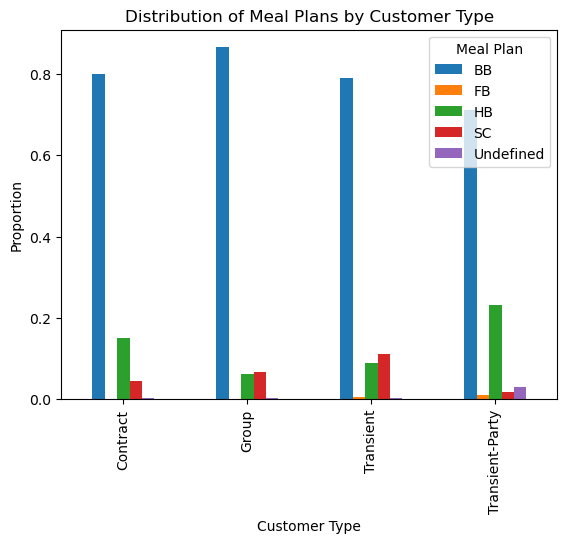

In [170]:
#11.Investigate the distribution of required car parking spaces and special requests by hotel type and meal plan. 12 .Compare the distribution of meal plans among different customer types (e.g., Transient, Group) to identify preferences.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')

# Investigate the distribution of required car parking spaces by hotel type and meal plan
car_parking_spaces_by_hotel_and_meal = df.groupby(['hotel', 'meal'])['required_car_parking_spaces'].mean().round(2).unstack()
print("\nDistribution of Required Car Parking Spaces by Hotel Type and Meal Plan:")
print(car_parking_spaces_by_hotel_and_meal)

# Investigate the distribution of special requests by hotel type and meal plan
special_requests_by_hotel_and_meal = df.groupby(['hotel', 'meal'])['total_of_special_requests'].mean().round(2).unstack()
print("\nDistribution of Special Requests by Hotel Type and Meal Plan:")
print(special_requests_by_hotel_and_meal)

# Compare the distribution of meal plans among different customer types
meal_plans_by_customer_type = df.groupby(['customer_type', 'meal']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
print("\nDistribution of Meal Plans by Customer Type:")
print(meal_plans_by_customer_type)

# Plot the distribution of meal plans by customer type
plt.figure(figsize=(10,6))
meal_plans_by_customer_type.plot(kind='bar')
plt.title('Distribution of Meal Plans by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Proportion')
plt.legend(title='Meal Plan')
plt.show()



Distribution of Bookings Across Different Market Segments:
market_segment
Online TA        47.30
Offline TA/TO    20.29
Groups           16.59
Direct           10.56
Corporate         4.44
Complementary     0.62
Aviation          0.20
Undefined         0.00
Name: proportion, dtype: float64


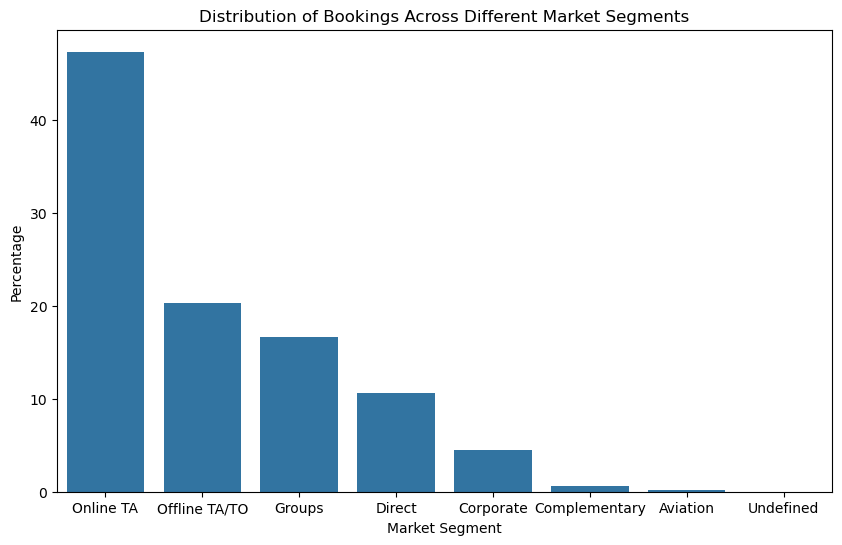


Summary Statistics for Lead Times Within Each Market Segment:
                  count    mean     std  min    25%    50%     75%    max
market_segment                                                           
Aviation          237.0    4.44    4.61  0.0   1.00    3.0    6.00   23.0
Complementary     743.0   13.29   31.82  0.0   0.00    3.0   11.00  386.0
Corporate        5295.0   22.13   37.43  0.0   2.00    7.0   26.50  343.0
Direct          12606.0   49.86   70.13  0.0   1.00   16.0   75.00  737.0
Groups          19811.0  186.97  136.83  0.0  70.00  162.0  285.00  629.0
Offline TA/TO   24219.0  135.00  112.00  0.0  40.00  109.0  201.00  532.0
Online TA       56477.0   83.00   79.06  0.0  18.00   58.0  129.00  403.0
Undefined           2.0    1.50    0.71  1.0   1.25    1.5    1.75    2.0


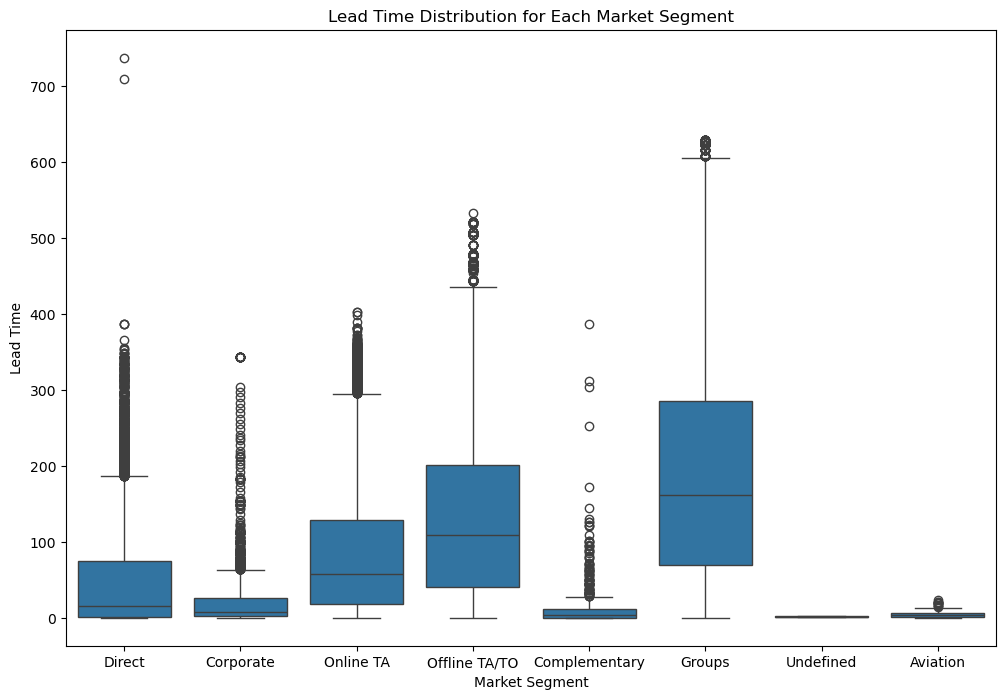

In [172]:
#12.Understand the distribution of bookings across different market segments and calculate summary statistics for lead times within each segment.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')

# Calculate the distribution of bookings across different market segments
market_segment_distribution = df['market_segment'].value_counts(normalize=True).mul(100).round(2)
print("\nDistribution of Bookings Across Different Market Segments:")
print(market_segment_distribution)

# Plot the distribution of bookings across different market segments
plt.figure(figsize=(10,6))
sns.barplot(x=market_segment_distribution.index, y=market_segment_distribution.values)
plt.title('Distribution of Bookings Across Different Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Percentage')
plt.show()

# Calculate summary statistics for lead times within each market segment
lead_time_summary_stats = df.groupby('market_segment')['lead_time'].describe().round(2)
print("\nSummary Statistics for Lead Times Within Each Market Segment:")
print(lead_time_summary_stats)

# Plot the lead time distribution for each market segment
plt.figure(figsize=(12,8))
sns.boxplot(x='market_segment', y='lead_time', data=df)
plt.title('Lead Time Distribution for Each Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Lead Time')
plt.show()




Distribution of Bookings Through Different Booking Channels:
distribution_channel
TA/TO        81.98
Direct       12.27
Corporate     5.59
GDS           0.16
Undefined     0.00
Name: proportion, dtype: float64


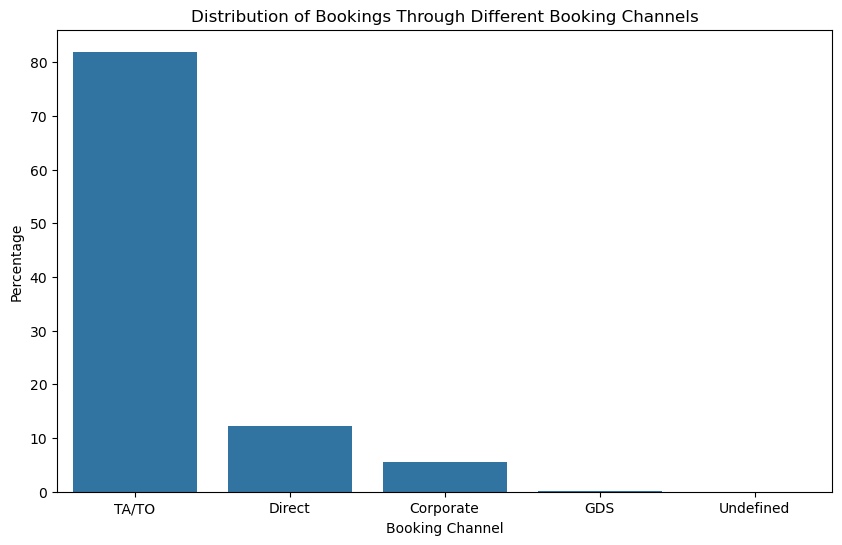


Percentage of Bookings Through Each Channel:
  distribution_channel  percentage
0                TA/TO       81.98
1               Direct       12.27
2            Corporate        5.59
3                  GDS        0.16
4            Undefined        0.00


In [3]:
#13.Analyze the distribution of bookings through different booking channels (e.g., online travel agents, direct bookings) and calculate the percentage of bookings through each channel.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')

# Calculate the distribution of bookings through different booking channels
booking_channel_distribution = df['distribution_channel'].value_counts(normalize=True).mul(100).round(2)

# Print the distribution of bookings through different booking channels
print("\nDistribution of Bookings Through Different Booking Channels:")
print(booking_channel_distribution)

# Plot the distribution of bookings through different booking channels
plt.figure(figsize=(10,6))
sns.barplot(x=booking_channel_distribution.index, y=booking_channel_distribution.values)
plt.title('Distribution of Bookings Through Different Booking Channels')
plt.xlabel('Booking Channel')
plt.ylabel('Percentage')
plt.show()

# Calculate the percentage of bookings through each channel
booking_channel_percentages = booking_channel_distribution.to_frame('percentage').reset_index()
booking_channel_percentages = booking_channel_percentages.rename(columns={'index': 'booking_channel'})

# Print the percentage of bookings through each channel
print("\nPercentage of Bookings Through Each Channel:")
print(booking_channel_percentages)



In [5]:
#14.Calculate the proportion of repeated guests and investigate their booking behavior. Identify any patterns or differences in preferences compared to firsttime guests.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')


In [7]:
# Calculate the proportion of repeated guests
repeated_guests_proportion = df['is_repeated_guest'].mean().round(2)
print(f"\nProportion of Repeated Guests: {repeated_guests_proportion:.2%}")



Proportion of Repeated Guests: 3.00%


In [9]:
# Investigate booking behavior of repeated guests
repeated_guests_bookings = df[df['is_repeated_guest'] == 1]
first_time_guests_bookings = df[df['is_repeated_guest'] == 0]


In [11]:
# Compare average lead time
repeated_guests_avg_lead_time = repeated_guests_bookings['lead_time'].mean().round(2)
first_time_guests_avg_lead_time = first_time_guests_bookings['lead_time'].mean().round(2)
print(f"\nAverage Lead Time for Repeated Guests: {repeated_guests_avg_lead_time} days")
print(f"Average Lead Time for First-Time Guests: {first_time_guests_avg_lead_time} days")



Average Lead Time for Repeated Guests: 30.79 days
Average Lead Time for First-Time Guests: 106.43 days


In [13]:
# Compare average booking duration
repeated_guests_avg_booking_duration = repeated_guests_bookings['stays_in_weekend_nights'] + repeated_guests_bookings['stays_in_week_nights']
first_time_guests_avg_booking_duration = first_time_guests_bookings['stays_in_weekend_nights'] + first_time_guests_bookings['stays_in_week_nights']
print(f"\nAverage Booking Duration for Repeated Guests: {repeated_guests_avg_booking_duration.mean().round(2)} nights")
print(f"Average Booking Duration for First-Time Guests: {first_time_guests_avg_booking_duration.mean().round(2)} nights")



Average Booking Duration for Repeated Guests: 1.93 nights
Average Booking Duration for First-Time Guests: 3.48 nights


In [15]:
# Compare distribution of meal plans
repeated_guests_meal_plan_distribution = repeated_guests_bookings['meal'].value_counts(normalize=True).mul(100).round(2)
first_time_guests_meal_plan_distribution = first_time_guests_bookings['meal'].value_counts(normalize=True).mul(100).round(2)
print("\nDistribution of Meal Plans for Repeated Guests:")
print(repeated_guests_meal_plan_distribution)
print("\nDistribution of Meal Plans for First-Time Guests:")
print(first_time_guests_meal_plan_distribution)



Distribution of Meal Plans for Repeated Guests:
meal
BB           91.15
HB            4.88
SC            2.89
Undefined     0.84
FB            0.24
Name: proportion, dtype: float64

Distribution of Meal Plans for First-Time Guests:
meal
BB           76.86
HB           12.35
SC            9.12
Undefined     0.98
FB            0.68
Name: proportion, dtype: float64


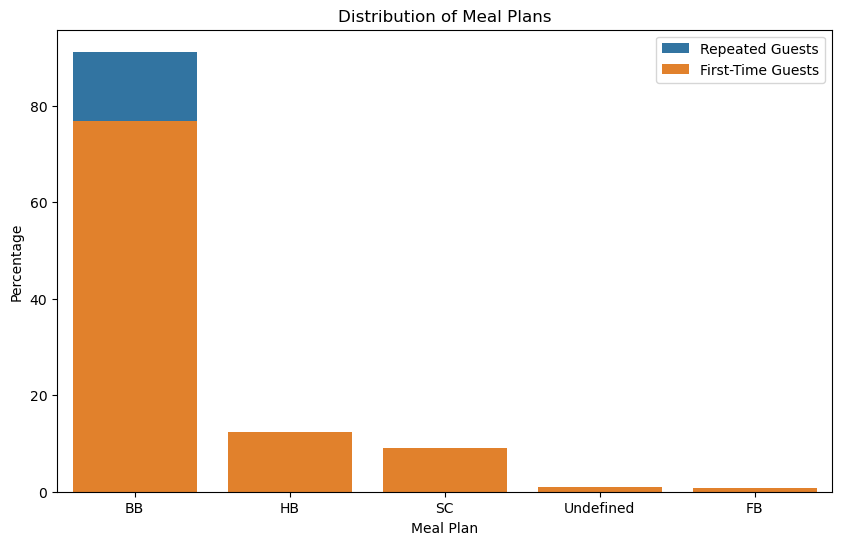

In [17]:
# Plot the distribution of meal plans for repeated and first-time guests
plt.figure(figsize=(10,6))
sns.barplot(x=repeated_guests_meal_plan_distribution.index, y=repeated_guests_meal_plan_distribution.values, label='Repeated Guests')
sns.barplot(x=first_time_guests_meal_plan_distribution.index, y=first_time_guests_meal_plan_distribution.values, label='First-Time Guests')
plt.title('Distribution of Meal Plans')
plt.xlabel('Meal Plan')
plt.ylabel('Percentage')
plt.legend()
plt.show()



In [19]:
#15.Explore the impact of a guest's booking history on their likelihood of canceling a current booking. Calculate cancellation rates based on previous cancellations and noncanceled bookings.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')


Cancellation Rates Based on Previous Cancellations:
previous_cancellations
0     0.34
1     0.94
2     0.33
3     0.31
4     0.23
5     0.11
6     0.32
11    0.29
13    0.92
14    1.00
19    1.00
21    1.00
24    1.00
25    1.00
26    1.00
Name: is_canceled, dtype: float64


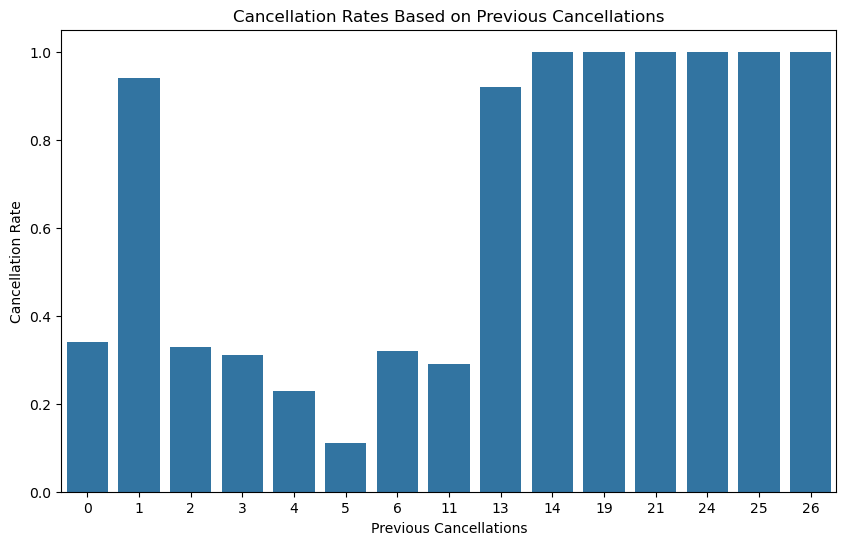

In [21]:
# Calculate cancellation rates based on previous cancellations
previous_cancellationsCancellationRate = df.groupby('previous_cancellations')['is_canceled'].mean().round(2)
print("\nCancellation Rates Based on Previous Cancellations:")
print(previous_cancellationsCancellationRate)

# Plot the cancellation rates based on previous cancellations
plt.figure(figsize=(10,6))
sns.barplot(x=previous_cancellationsCancellationRate.index, y=previous_cancellationsCancellationRate.values)
plt.title('Cancellation Rates Based on Previous Cancellations')
plt.xlabel('Previous Cancellations')
plt.ylabel('Cancellation Rate')
plt.show()



Cancellation Rates Based on Previous Non-Canceled Bookings:
previous_bookings_not_canceled
0     0.38
1     0.05
2     0.06
3     0.05
4     0.05
      ... 
68    0.00
69    0.00
70    0.00
71    0.00
72    0.00
Name: is_canceled, Length: 73, dtype: float64


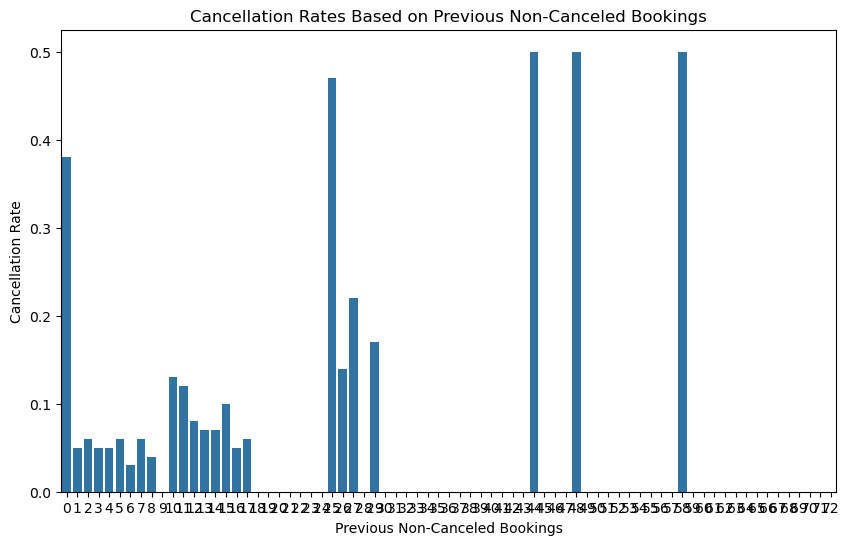

In [23]:
# Calculate cancellation rates based on previous non-canceled bookings
previous_non_canceled_bookings = df['previous_bookings_not_canceled']
cancellation_rate_by_previous_non_canceled_bookings = df.groupby(previous_non_canceled_bookings)['is_canceled'].mean().round(2)
print("\nCancellation Rates Based on Previous Non-Canceled Bookings:")
print(cancellation_rate_by_previous_non_canceled_bookings)

# Plot the cancellation rates based on previous non-canceled bookings
plt.figure(figsize=(10,6))
sns.barplot(x=cancellation_rate_by_previous_non_canceled_bookings.index, y=cancellation_rate_by_previous_non_canceled_bookings.values)
plt.title('Cancellation Rates Based on Previous Non-Canceled Bookings')
plt.xlabel('Previous Non-Canceled Bookings')
plt.ylabel('Cancellation Rate')
plt.show()



Relationship Between Previous Cancellations and Previous Non-Canceled Bookings:
previous_cancellations
0      0.08
1      0.47
2      7.28
3     16.18
4     20.10
5     35.68
6     46.95
11    11.89
13     0.92
14     0.00
19     0.00
21     0.00
24     0.00
25     0.00
26     0.00
Name: previous_bookings_not_canceled, dtype: float64


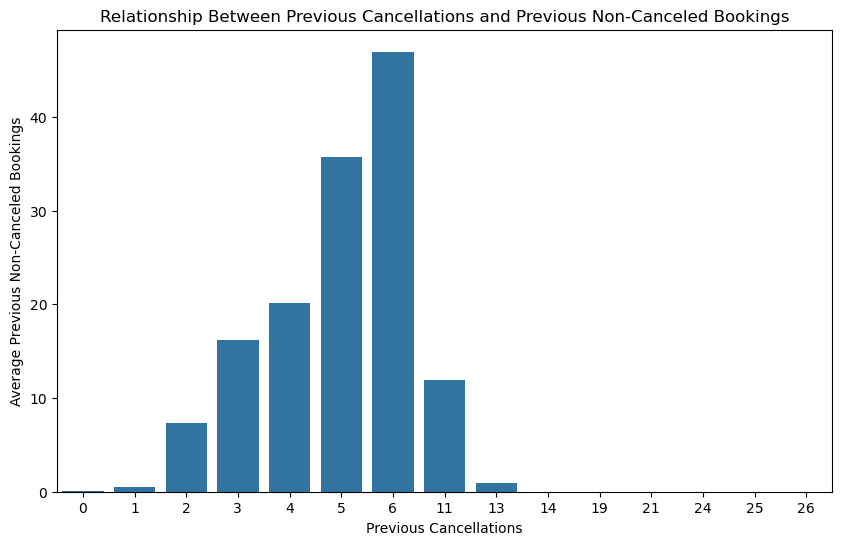

In [25]:
# Investigate the relationship between previous cancellations and previous non-canceled bookings
previous_cancellations_vs_non_canceled_bookings = df.groupby('previous_cancellations')['previous_bookings_not_canceled'].mean().round(2)
print("\nRelationship Between Previous Cancellations and Previous Non-Canceled Bookings:")
print(previous_cancellations_vs_non_canceled_bookings)

# Plot the relationship between previous cancellations and previous non-canceled bookings
plt.figure(figsize=(10,6))
sns.barplot(x=previous_cancellations_vs_non_canceled_bookings.index, y=previous_cancellations_vs_non_canceled_bookings.values)
plt.title('Relationship Between Previous Cancellations and Previous Non-Canceled Bookings')
plt.xlabel('Previous Cancellations')
plt.ylabel('Average Previous Non-Canceled Bookings')
plt.show()


In [27]:
#16.Understand the distribution of reserved and assigned room types. Calculate summary statistics for the consistency between reserved and assigned room types.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')


Distribution of Reserved Room Types:
reserved_room_type
A    72.03
D    16.08
E     5.47
F     2.43
G     1.75
B     0.94
C     0.78
H     0.50
P     0.01
L     0.01
Name: proportion, dtype: float64


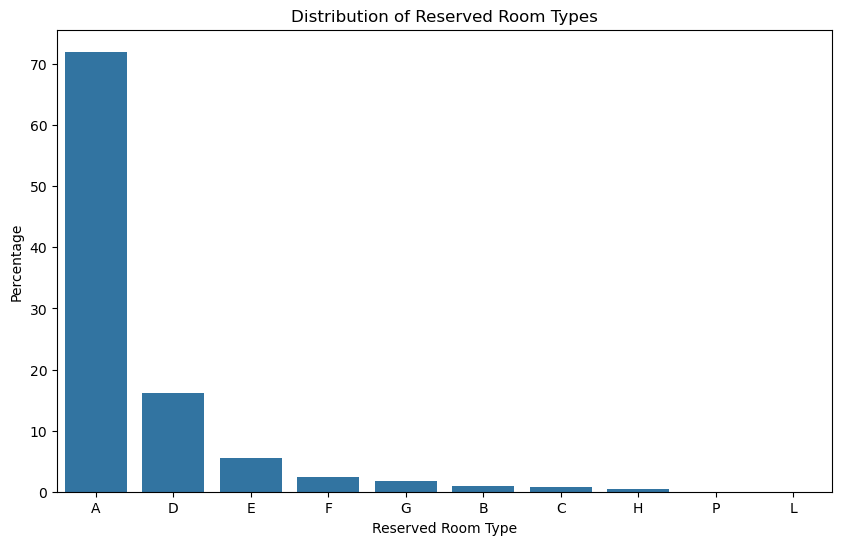

In [29]:
# Calculate the distribution of reserved room types
reserved_room_type_distribution = df['reserved_room_type'].value_counts(normalize=True).mul(100).round(2)
print("\nDistribution of Reserved Room Types:")
print(reserved_room_type_distribution)

# Plot the distribution of reserved room types
plt.figure(figsize=(10,6))
sns.barplot(x=reserved_room_type_distribution.index, y=reserved_room_type_distribution.values)
plt.title('Distribution of Reserved Room Types')
plt.xlabel('Reserved Room Type')
plt.ylabel('Percentage')
plt.show()



Distribution of Assigned Room Types:
assigned_room_type
A    62.03
D    21.21
E     6.54
F     3.14
G     2.14
C     1.99
B     1.81
H     0.60
I     0.30
K     0.23
P     0.01
L     0.00
Name: proportion, dtype: float64


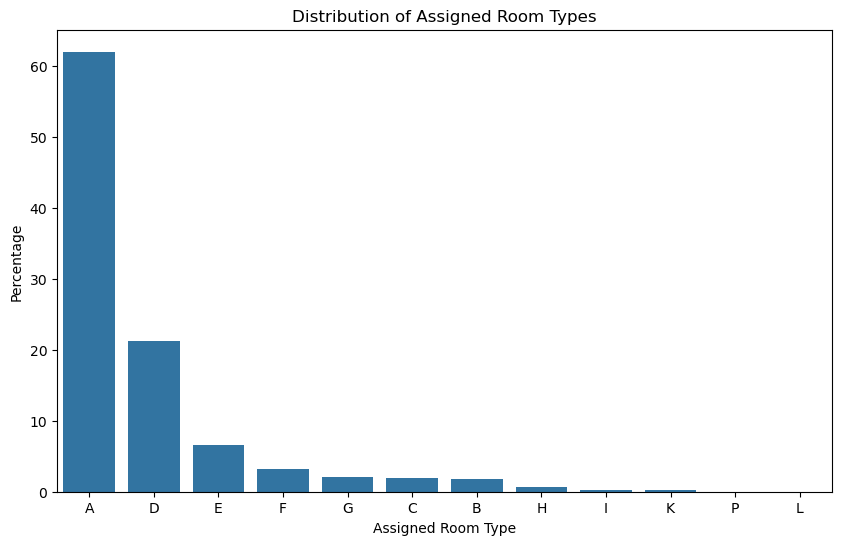

In [31]:
# Calculate the distribution of assigned room types
assigned_room_type_distribution = df['assigned_room_type'].value_counts(normalize=True).mul(100).round(2)
print("\nDistribution of Assigned Room Types:")
print(assigned_room_type_distribution)

# Plot the distribution of assigned room types
plt.figure(figsize=(10,6))
sns.barplot(x=assigned_room_type_distribution.index, y=assigned_room_type_distribution.values)
plt.title('Distribution of Assigned Room Types')
plt.xlabel('Assigned Room Type')
plt.ylabel('Percentage')
plt.show()



Consistency Between Reserved and Assigned Room Types: 88.00%


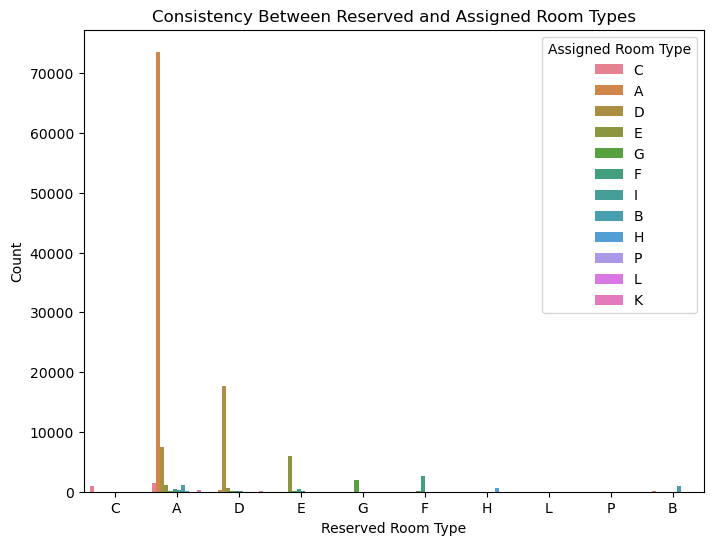

In [33]:
# Calculate summary statistics for the consistency between reserved and assigned room types
consistency_summary_stats = df['reserved_room_type'].eq(df['assigned_room_type']).mean().round(2)
print(f"\nConsistency Between Reserved and Assigned Room Types: {consistency_summary_stats:.2%}")

# Plot the consistency between reserved and assigned room types
plt.figure(figsize=(8,6))
sns.countplot(x='reserved_room_type', hue='assigned_room_type', data=df)
plt.title('Consistency Between Reserved and Assigned Room Types')
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.legend(title='Assigned Room Type')
plt.show()


In [35]:
#17.Analyze the impact of booking changes on cancellation rates. Calculate cancellation rates for bookings with different numbers of changes.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')


Cancellation Rates for Bookings with Different Numbers of Changes:
booking_changes
0     0.41
1     0.14
2     0.20
3     0.16
4     0.18
5     0.17
6     0.29
7     0.10
8     0.24
9     0.12
10    0.17
11    0.00
12    0.00
13    0.00
14    0.20
15    0.00
16    0.50
17    0.00
18    0.00
20    0.00
21    0.00
Name: is_canceled, dtype: float64


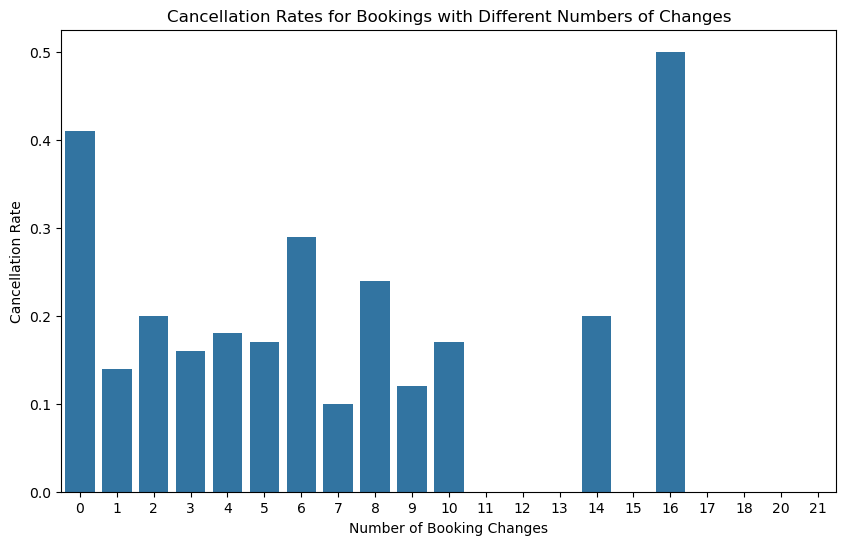

In [37]:
# Calculate cancellation rates for bookings with different numbers of changes
booking_changes_cancellation_rates = df.groupby('booking_changes')['is_canceled'].mean().round(2)
print("\nCancellation Rates for Bookings with Different Numbers of Changes:")
print(booking_changes_cancellation_rates)

# Plot the cancellation rates for bookings with different numbers of changes
plt.figure(figsize=(10,6))
sns.barplot(x=booking_changes_cancellation_rates.index, y=booking_changes_cancellation_rates.values)
plt.title('Cancellation Rates for Bookings with Different Numbers of Changes')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Cancellation Rate')
plt.show()



Relationship Between Booking Changes and Cancellation Rates:
    booking_changes  cancellation_rate
0                 0           0.408542
1                 1           0.142272
2                 2           0.201314
3                 3           0.155340
4                 4           0.178191
5                 5           0.169492
6                 6           0.285714
7                 7           0.096774
8                 8           0.235294
9                 9           0.125000
10               10           0.166667
11               11           0.000000
12               12           0.000000
13               13           0.000000
14               14           0.200000
15               15           0.000000
16               16           0.500000
17               17           0.000000
18               18           0.000000
19               20           0.000000
20               21           0.000000


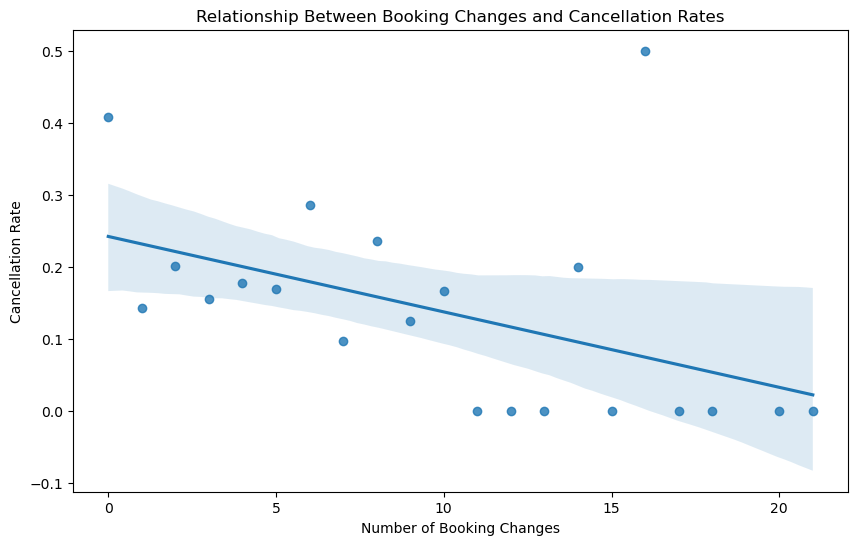

In [39]:
# Analyze the relationship between booking changes and cancellation rates
booking_changes_vs_cancellation_rates = df.groupby('booking_changes')['is_canceled'].mean().reset_index()
booking_changes_vs_cancellation_rates = booking_changes_vs_cancellation_rates.rename(columns={'is_canceled': 'cancellation_rate'})
print("\nRelationship Between Booking Changes and Cancellation Rates:")
print(booking_changes_vs_cancellation_rates)

# Plot the relationship between booking changes and cancellation rates
plt.figure(figsize=(10,6))
sns.regplot(x='booking_changes', y='cancellation_rate', data=booking_changes_vs_cancellation_rates)
plt.title('Relationship Between Booking Changes and Cancellation Rates')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Cancellation Rate')
plt.show()


In [41]:
#18.Explore how room type preferences vary across different customer types (e.g., Transient, Group). Identify if certain customer types have specific room preferences.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')


Room Type Preferences for Each Customer Type:
reserved_room_type         A         B         C         D         E  \
customer_type                                                          
Contract            0.703386  0.018400  0.002453  0.206820  0.043425   
Group               0.632582  0.010399  0.008666  0.247834  0.057192   
Transient           0.680125  0.007108  0.009240  0.183232  0.062145   
Transient-Party     0.868253  0.015921  0.003542  0.071446  0.030091   

reserved_room_type         F         G         H         L         P  
customer_type                                                         
Contract            0.025025  0.000245  0.000245       NaN       NaN  
Group               0.017331  0.020797  0.003466       NaN  0.001733  
Transient           0.029717  0.021838  0.006405  0.000067  0.000123  
Transient-Party     0.004856  0.004936  0.000955       NaN       NaN  


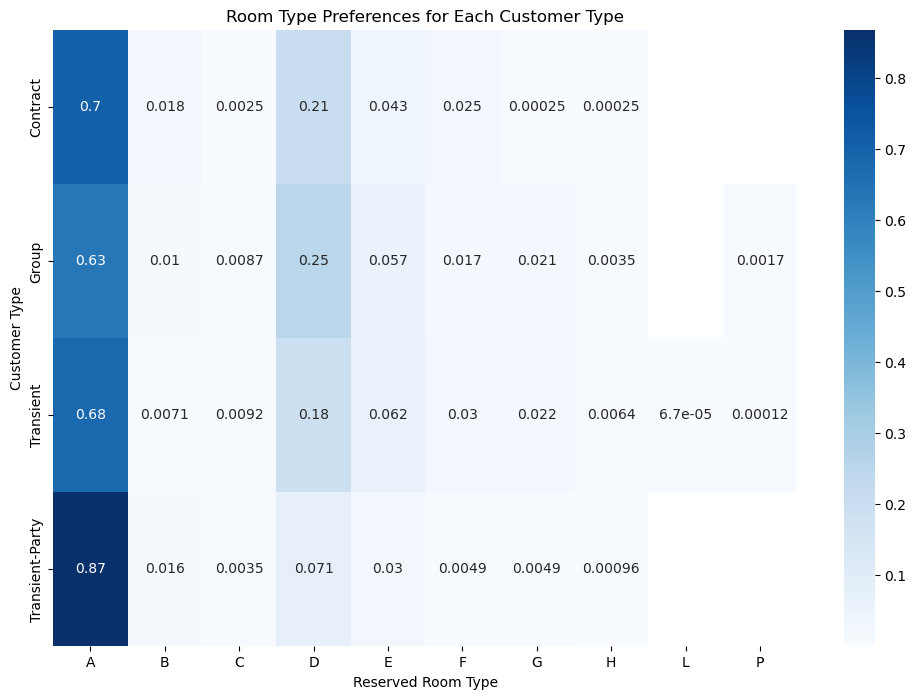

In [43]:
# Calculate room type preferences for each customer type
room_type_preferences = df.groupby(['customer_type', 'reserved_room_type']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Print room type preferences for each customer type
print("\nRoom Type Preferences for Each Customer Type:")
print(room_type_preferences)

# Plot room type preferences for each customer type
plt.figure(figsize=(12,8))
sns.heatmap(room_type_preferences, annot=True, cmap='Blues')
plt.title('Room Type Preferences for Each Customer Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Customer Type')
plt.show()



In [47]:
# Identify if certain customer types have specific room preferences
specific_room_preferences = room_type_preferences.apply(lambda x: x.nlargest(1), axis=1)

# Print specific room preferences for each customer type
print("\nSpecific Room Preferences for Each Customer Type:")
print(specific_room_preferences)




Specific Room Preferences for Each Customer Type:
reserved_room_type         A
customer_type               
Contract            0.703386
Group               0.632582
Transient           0.680125
Transient-Party     0.868253


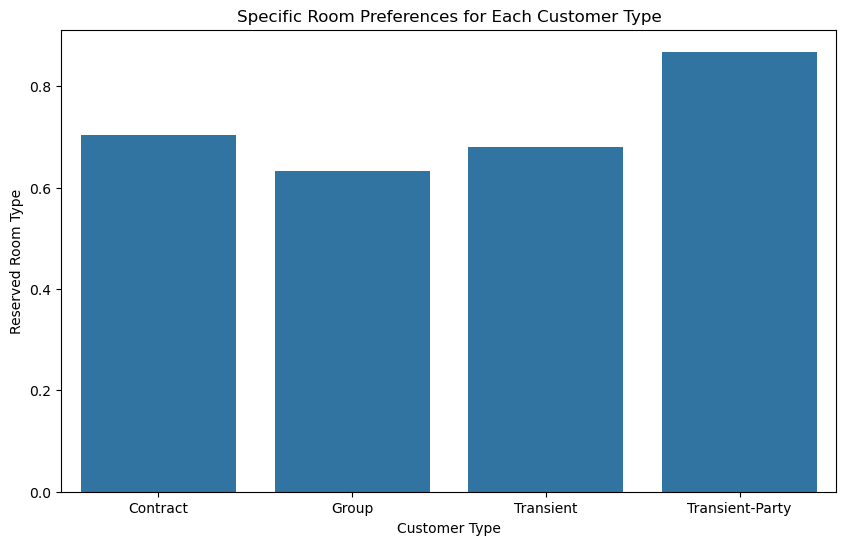

In [53]:
# Plot specific room preferences for each customer type
plt.figure(figsize=(10,6))
sns.barplot(x=specific_room_preferences.index.get_level_values(0), y=specific_room_preferences.values.flatten())
plt.title('Specific Room Preferences for Each Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Reserved Room Type')
plt.show()



In [ ]:
#19.Examine whether guests who make multiple bookings have consistent room type preferences or if their preferences change over time.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')

In [ ]:
# Filter the data to include only guests who made multiple bookings
multiple_bookings_df = df[df['name'].duplicated(keep=False)]


In [ ]:
# Calculate the number of unique room types booked by each guest
unique_room_types = multiple_bookings_df.groupby('name')['reserved_room_type'].nunique().reset_index()


In [ ]:
# Calculate the percentage of guests who booked the same room type for all their bookings
consistent_preferences = unique_room_types[unique_room_types['reserved_room_type'] == 1]
percentage_consistent_preferences = (len(consistent_preferences) / len(unique_room_types)) * 100
print(f"\nPercentage of guests with consistent room type preferences: {percentage_consistent_preferences:.2f}%")


In [ ]:
# Examine the room type preferences of guests who made multiple bookings over time
plt.figure(figsize=(12,8))
g = sns.FacetGrid(multiple_bookings_df, col="name", height=4, aspect=1.5)
g.map(sns.lineplot, "arrival_date_year", "reserved_room_type")
g.set_titles(col_template="{col_name}")
g.fig.tight_layout()
plt.show()


In [ ]:
# Plot the distribution of unique room types booked by each guest
plt.figure(figsize=(10,6))
sns.histplot(unique_room_types['reserved_room_type'], kde=True)
plt.title('Distribution of Unique Room Types Booked by Each Guest')
plt.xlabel('Unique Room Types')
plt.ylabel('Count')
plt.show()

In [ ]:

# Examine the change in room type preferences over time
room_type_changes = multiple_bookings_df.groupby(['name', 'arrival_date_year'])['reserved_room_type'].apply(lambda x: x.nunique()).reset_index()
room_type_changes = room_type_changes.rename(columns={'reserved_room_type': 'room_type_changes'})

In [ ]:
# Plot the change in room type preferences over time
plt.figure(figsize=(12,8))
sns.lineplot(x='arrival_date_year', y='room_type_changes', hue='name', data=room_type_changes)
plt.title('Change in Room Type Preferences Over Time')
plt.xlabel('Arrival Date Year')
plt.ylabel('Room Type Changes')
plt.legend(title='Guest Name')
plt.show()


In [ ]:
#20.Understand the distribution of reservation statuses and calculate summary statistics for reservation status dates.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')


Distribution of Reservation Statuses:
reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64


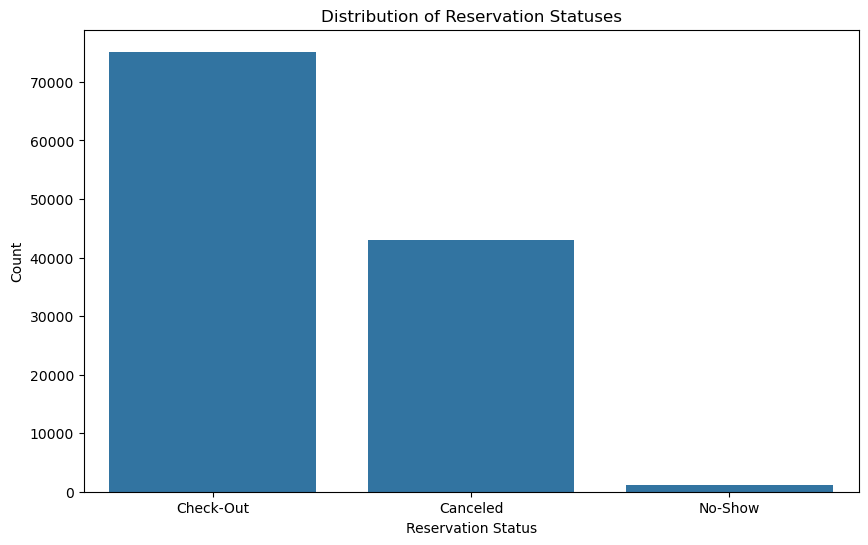


Summary Statistics for Reservation Status Dates:
count         119390
unique           926
top       10/21/2015
freq            1461
Name: reservation_status_date, dtype: object


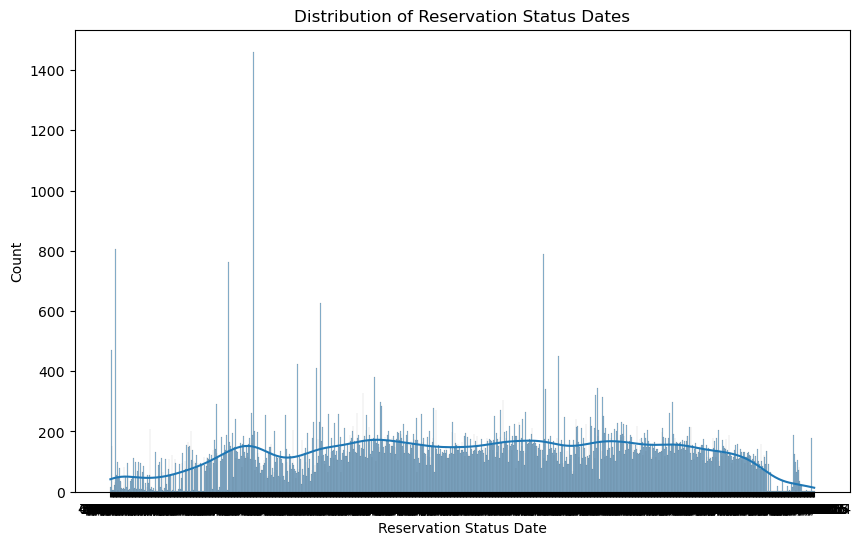

In [11]:
# Examine the distribution of reservation statuses
reservation_status_counts = df['reservation_status'].value_counts()
print("\nDistribution of Reservation Statuses:")
print(reservation_status_counts)

# Plot the distribution of reservation statuses
plt.figure(figsize=(10,6))
sns.countplot(x='reservation_status', data=df)
plt.title('Distribution of Reservation Statuses')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.show()

# Calculate summary statistics for reservation status dates
reservation_status_date_stats = df['reservation_status_date'].describe()
print("\nSummary Statistics for Reservation Status Dates:")
print(reservation_status_date_stats)

# Plot the distribution of reservation status dates
plt.figure(figsize=(10,6))
sns.histplot(df['reservation_status_date'], kde=True)
plt.title('Distribution of Reservation Status Dates')
plt.xlabel('Reservation Status Date')
plt.ylabel('Count')
plt.show()


In [13]:
#21.Analyze trends in reservation status dates, including the most common checkout dates and any seasonality patterns.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')

In [15]:

# Convert the reservation status date column to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Drop any rows with missing values in the reservation_status_date column
df = df.dropna(subset=['reservation_status_date'])

# Extract the month and day of the week from the reservation status date
df['reservation_status_month'] = df['reservation_status_date'].dt.month
df['reservation_status_day_of_week'] = df['reservation_status_date'].dt.dayofweek




Most Common Checkout Dates:
reservation_status_date
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
2015-07-02     469
2016-12-07     450
2015-12-18     423
2016-02-09     412
2016-04-04     382
Name: count, dtype: int64


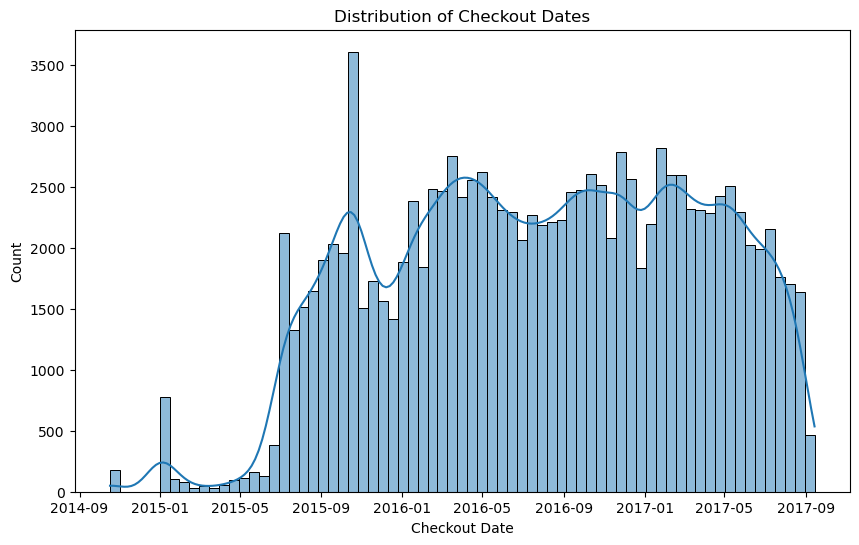

In [19]:
# Analyze the most common checkout dates
checkout_dates = df['reservation_status_date'].value_counts()
print("\nMost Common Checkout Dates:")
print(checkout_dates.head(10))

# Plot the distribution of checkout dates
plt.figure(figsize=(10,6))
sns.histplot(df['reservation_status_date'], kde=True)
plt.title('Distribution of Checkout Dates')
plt.xlabel('Checkout Date')
plt.ylabel('Count')
plt.show()



Seasonality Patterns:
reservation_status_month
1     10681
2      9498
3     10230
4      9999
5     10304
6      9278
7     12106
8     11249
9      9403
10    11143
11     8099
12     7400
Name: reservation_status_date, dtype: int64


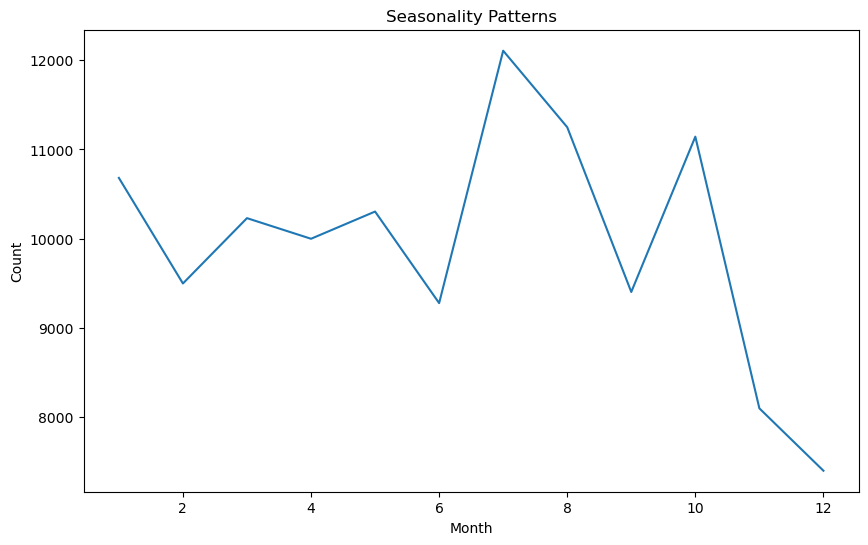

In [21]:
# Analyze seasonality patterns
seasonality = df.groupby('reservation_status_month')['reservation_status_date'].count()
print("\nSeasonality Patterns:")
print(seasonality)

# Plot the seasonality patterns
plt.figure(figsize=(10,6))
sns.lineplot(x=seasonality.index, y=seasonality.values)
plt.title('Seasonality Patterns')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()



Day of the Week Patterns:
reservation_status_day_of_week
0    18692
1    16731
2    17943
3    18141
4    18471
5    12924
6    16488
Name: reservation_status_date, dtype: int64


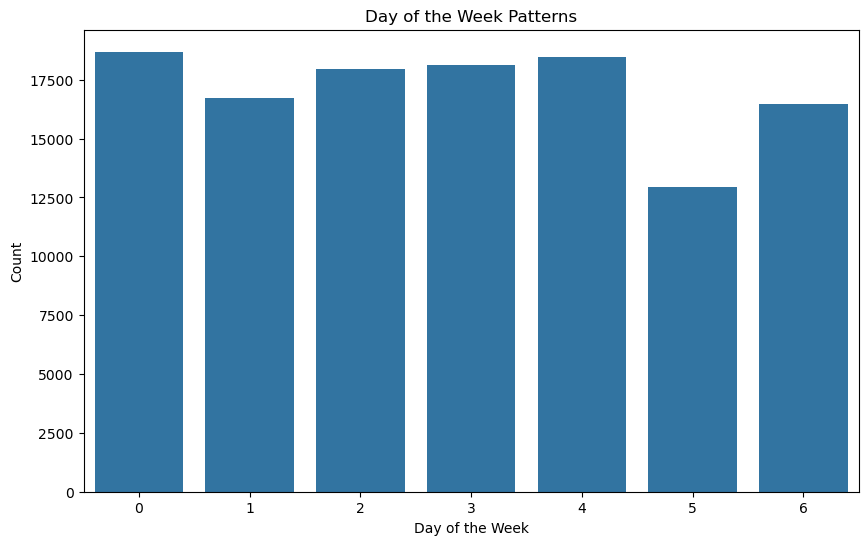

In [23]:
# Analyze day of the week patterns
day_of_week = df.groupby('reservation_status_day_of_week')['reservation_status_date'].count()
print("\nDay of the Week Patterns:")
print(day_of_week)

# Plot the day of the week patterns
plt.figure(figsize=(10,6))
sns.barplot(x=day_of_week.index, y=day_of_week.values)
plt.title('Day of the Week Patterns')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

In [25]:
#22.Explore how reservation statuses vary across different customer types (e.g., Transient, Group) using Excel or SQL. Calculate cancellation rates by customer type.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')


In [27]:
# Calculate cancellation rates by customer type
cancellation_rates = df.groupby('customer_type')['is_canceled'].mean().reset_index()
cancellation_rates = cancellation_rates.rename(columns={'is_canceled': 'cancellation_rate'})

# Print the cancellation rates by customer type
print("\nCancellation Rates by Customer Type:")
print(cancellation_rates)



Cancellation Rates by Customer Type:
     customer_type  cancellation_rate
0         Contract           0.309617
1            Group           0.102253
2        Transient           0.407463
3  Transient-Party           0.254299


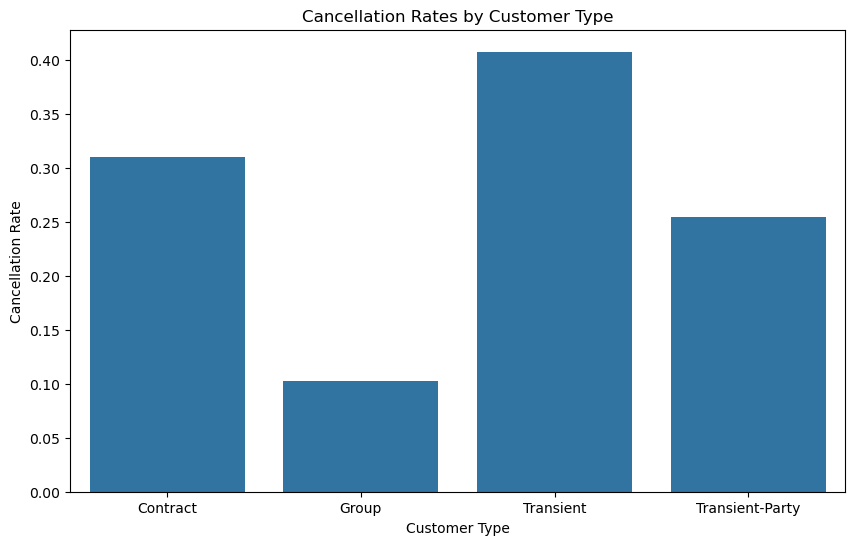

In [9]:
# Plot the cancellation rates by customer type
plt.figure(figsize=(10,6))
sns.barplot(x='customer_type', y='cancellation_rate', data=cancellation_rates)
plt.title('Cancellation Rates by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.show()



Reservation Statuses by Customer Type:
      customer_type reservation_status  count
0          Contract           Canceled   1236
1          Contract          Check-Out   2814
2          Contract            No-Show     26
3             Group           Canceled     55
4             Group          Check-Out    518
5             Group            No-Show      4
6         Transient           Canceled  35557
7         Transient          Check-Out  53099
8         Transient            No-Show    957
9   Transient-Party           Canceled   6169
10  Transient-Party          Check-Out  18735
11  Transient-Party            No-Show    220


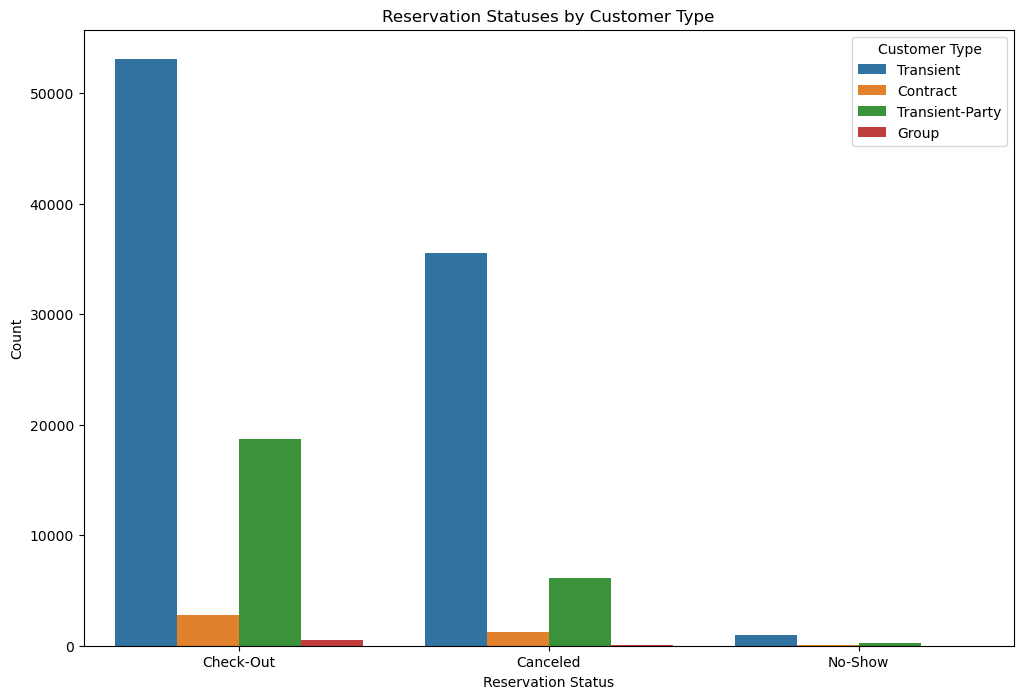

In [31]:
# Explore how reservation statuses vary across different customer types
reservation_statuses = df.groupby(['customer_type', 'reservation_status']).size().reset_index(name='count')

# Print the reservation statuses by customer type
print("\nReservation Statuses by Customer Type:")
print(reservation_statuses)

# Plot the reservation statuses by customer type
plt.figure(figsize=(12,8))
sns.countplot(x='reservation_status', hue='customer_type', data=df)
plt.title('Reservation Statuses by Customer Type')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()



In [33]:
#23.Investigate whether there are differences in Average Daily Rates (ADR) based on reservation status (e.g., canceled vs. checkedout)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')


Mean ADR by Reservation Status:
  reservation_status         adr
0           Canceled  105.205241
1          Check-Out   99.987693
2            No-Show   96.378459


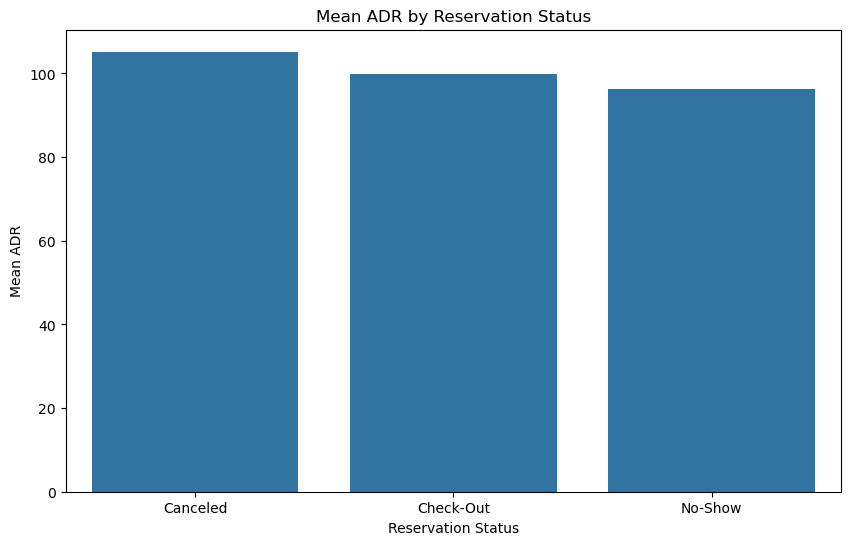

In [35]:

# Group by reservation status and calculate the mean ADR
adr_by_status = df.groupby('reservation_status')['adr'].mean().reset_index()

# Print the mean ADR by reservation status
print("\nMean ADR by Reservation Status:")
print(adr_by_status)

# Plot the mean ADR by reservation status
plt.figure(figsize=(10,6))
sns.barplot(x='reservation_status', y='adr', data=adr_by_status)
plt.title('Mean ADR by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Mean ADR')
plt.show()


In [37]:
# Perform a t-test to compare the mean ADR between canceled and checked-out reservations
canceled_adr = df[df['reservation_status'] == 'Canceled']['adr']
checked_out_adr = df[df['reservation_status'] == 'Checked Out']['adr']

from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(canceled_adr, checked_out_adr)

print("\nT-test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis. The mean ADR is significantly different between canceled and checked-out reservations.")
else:
    print("Fail to reject the null hypothesis. The mean ADR is not significantly different between canceled and checked-out reservations.")



T-test Results:
T-statistic: nan
P-value: nan
Fail to reject the null hypothesis. The mean ADR is not significantly different between canceled and checked-out reservations.
